## Import Packages

In [1]:
from fastbook import *
from fastai.vision.widgets import *
import torch
from fastai.tabular.all import *

## Constants

In [2]:
# Set all constants
training_data_path = "Images"
model_path = "Model/"
img_size = 128

## Data Loading & Augmentation

In [3]:
model_data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(img_size)
)

In [4]:
dls = model_data.dataloaders(training_data_path)

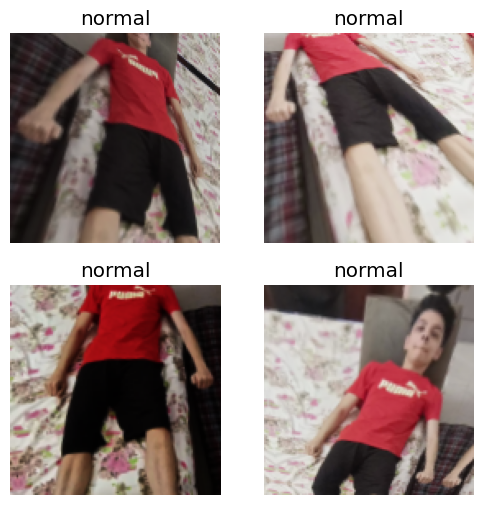

In [5]:
model_aug = model_data.new(item_tfms=Resize(img_size), batch_tfms=aug_transforms(mult=2))
dls = model_aug.dataloaders(training_data_path)
dls.train.show_batch(max_n=4, nrows=2, unique=True)

## Model Training

In [6]:
learn = vision_learner(dls, resnet34, metrics=[accuracy, error_rate])

SuggestedLRs(valley=0.0014454397605732083)

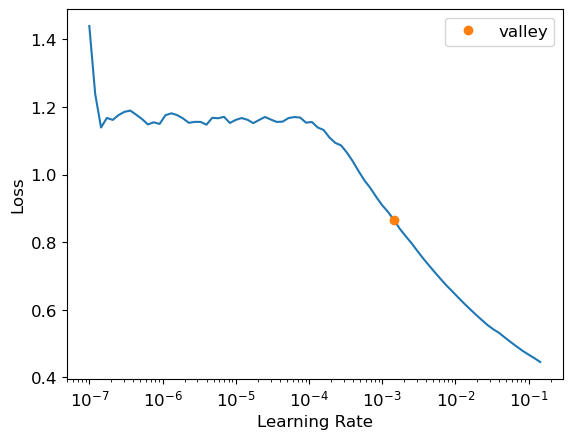

In [7]:
learning_rate = learn.lr_find()
learning_rate

In [8]:
learn.fit(3, lr=learning_rate)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.100297,0.000461,1.000000,0.000000,01:08
1,0.041746,0.000007,1.000000,0.000000,01:05
2,0.022246,0.000007,1.000000,0.000000,01:05


## Results

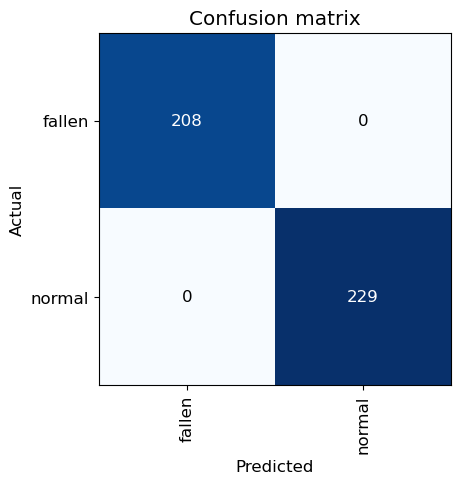

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

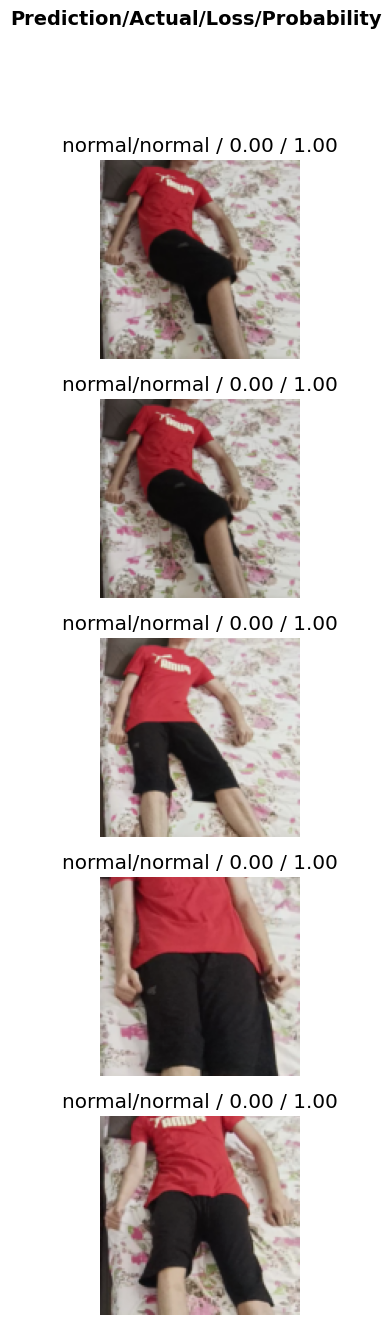

In [10]:
interp.plot_top_losses(5, nrows=5)

In [11]:
interp.print_classification_report()

              precision    recall  f1-score   support

      fallen       1.00      1.00      1.00       208
      normal       1.00      1.00      1.00       229

    accuracy                           1.00       437
   macro avg       1.00      1.00      1.00       437
weighted avg       1.00      1.00      1.00       437



In [12]:
learn.export(model_path + "Model.pkl")
torch.save(learn, model_path + "Pt_Model.pt")

RuntimeError: Parent directory Model does not exist.

## Convert the Model to ONNX Model

In [ ]:
import torch
import torch.onnx

learn = load_learner(model_path + 'Model2.pkl')
model = learn.model.eval()
dummy_data = torch.randn(1, 3, img_size, img_size)
dummy_input = torch.autograd.Variable(dummy_data)

output_model_name = 'onnx_greenscape2.onnx'
input_name = 'image'
output_name = 'warn'

torch.onnx.export(model, dummy_input, model_path + output_model_name, input_names = [input_name], output_names = [output_name])

In [ ]:
import onnx
onnx_model = onnx.load(model_path + output_model_name)
onnx.checker.check_model(onnx_model)
model